In [34]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [35]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [36]:
d1  = '/content/gdrive/MyDrive/dataset_project/train_knn.txt'
d2  = '/content/gdrive/MyDrive/dataset_project/test_knn.txt'

train = pd.read_csv(d1, sep=',' , header = None)
test = pd.read_csv(d2, sep=',' , header = None)
print(train)
print(test)

    0  1  2
0   7  7  1
1   7  4  1
2   6  4  1
3   7  5  1
4   7  6  1
5   6  7  1
6   6  6  1
7   3  4  2
8   2  3  2
9   3  2  2
10  4  3  2
11  3  3  2
12  4  4  2
13  1  4  2
   0  1
0  3  7
1  7  7
2  4  3
3  2  8
4  3  5
5  1  2
6  4  8
7  8  3
8  8  4


In [37]:
class_1 = train[train[2]==1]
print(class_1)

   0  1  2
0  7  7  1
1  7  4  1
2  6  4  1
3  7  5  1
4  7  6  1
5  6  7  1
6  6  6  1


In [38]:
class_2 = train[train[2]==2]
print(class_2)

    0  1  2
7   3  4  2
8   2  3  2
9   3  2  2
10  4  3  2
11  3  3  2
12  4  4  2
13  1  4  2


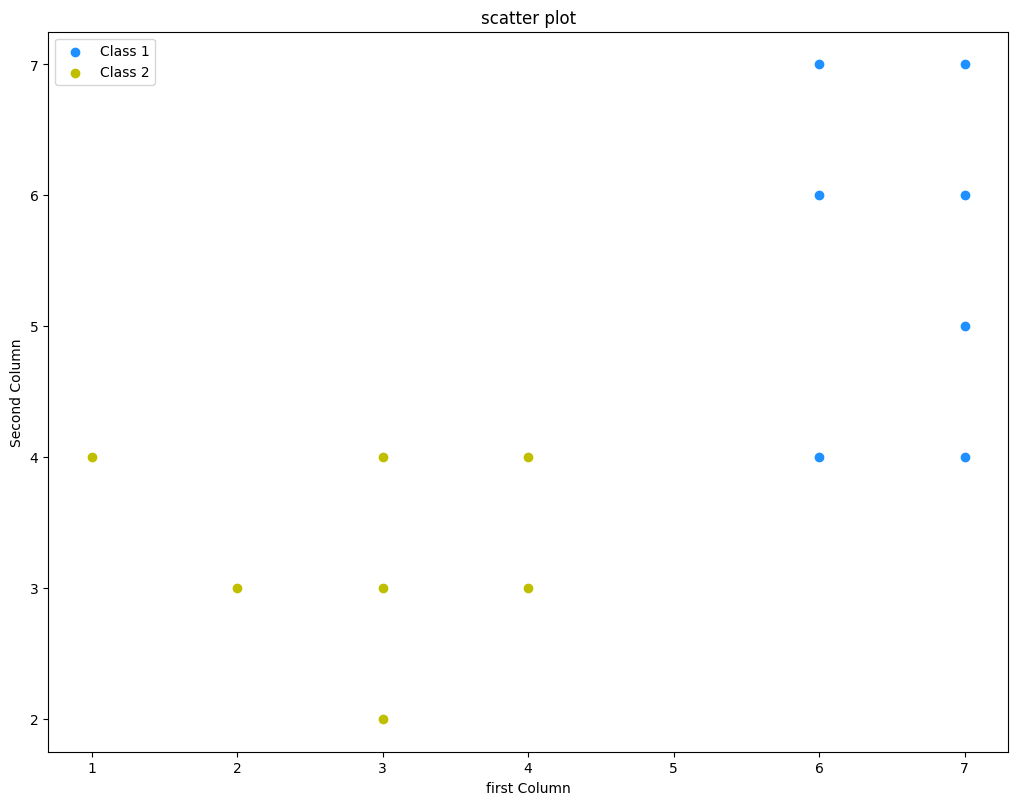

In [39]:
fig=plt.figure()
ax=fig.add_axes([0,0,1.5,1.5])
ax.scatter(class_1[0], class_1[1], color='dodgerblue', label="Class 1")
ax.scatter(class_2[0], class_2[1] , color='y', label="Class 2")
ax.set_xlabel('first Column')
ax.set_ylabel('Second Column')
ax.set_title('scatter plot')
plt.legend(loc="upper left")
plt.show()

In [40]:
def bubbleSort(array, train_points, target_label):
    for i in range(len(array)):
        for j in range(0, len(array) - i - 1):
            if array[j] > array[j + 1]:
                # Swap array elements
                array[j], array[j+1] = array[j+1], array[j]

                # Swap train_points elements
                train_points[j], train_points[j+1] = train_points[j+1], train_points[j]

                # Swap target_label elements
                target_label[j], target_label[j+1] = target_label[j+1], target_label[j]
    return array, train_points, target_label

In [41]:
def calculate_dist(x,y):
    global train
    dist = []
    train_points = []
    target_label = list(train[2])
    for i,j in zip(train[0], train[1]):
        dist.append(((i-x)**2 +(j-y)**2))
        train_points.append((i, j))
    dist, train_points, target_label = bubbleSort(dist, train_points, target_label)
    return dist, train_points, target_label

In [42]:
distances = []
train_points = []
target_labels = []
for i,j in zip(test[0], test[1]):
    a, b, c = calculate_dist(i,j)
    distances.append(a)
    train_points.append(b)
    target_labels.append(c)

In [43]:
distances = np.array(distances)
print(distances.shape)
target_labels = np.array(target_labels)
print(target_labels.shape)

(9, 14)
(9, 14)


In [44]:
test = np.array(test)
print(test)

[[3 7]
 [7 7]
 [4 3]
 [2 8]
 [3 5]
 [1 2]
 [4 8]
 [8 3]
 [8 4]]


In [45]:
k=3
output = []
predicted_class_1 = []
predicted_class_2 = []
prediction_text = []
for i in range(len(test)):
    count_1, count_2 = 0, 0
    print('Test Point: ', test[i])
    s = 'Test Point: '+ str(test[i]) + '\n'
    prediction_text.append(s)
    for j in range(k):
        if j < len(train_points[i]):
            print('Distance : ', distances[i][j], 'Class : ', target_labels[i][j], 'Train Point: ', train_points[i][j])
            s = 'Distance : '+ str(distances[i][j])  + '   Class : ' + str(target_labels[i][j]) + '   Train Point: ' + str(train_points[i][j]) + '\n'
            prediction_text.append(s)
            if target_labels[i][j] == 1:
                count_1 += 1
            else:
                count_2 += 1
        else:
            print('No more train points for this test point.')
    if count_1 > count_2:
        print('Predicted Class 1')
        prediction_text.append('Predicted Class 1' + '\n\n')
        predicted_class_1.append(list(test[i]))
    else:
        print('Predicted Class 2')
        prediction_text.append('Predicted Class 2' + '\n\n')
        predicted_class_2.append(list(test[i]))
    print('\n\n')

Test Point:  [3 7]
Distance :  9 Class :  1 Train Point:  (6, 7)
Distance :  9 Class :  2 Train Point:  (3, 4)
Distance :  10 Class :  1 Train Point:  (6, 6)
Predicted Class 1



Test Point:  [7 7]
Distance :  0 Class :  1 Train Point:  (7, 7)
Distance :  1 Class :  1 Train Point:  (7, 6)
Distance :  1 Class :  1 Train Point:  (6, 7)
Predicted Class 1



Test Point:  [4 3]
Distance :  0 Class :  2 Train Point:  (4, 3)
Distance :  1 Class :  2 Train Point:  (3, 3)
Distance :  1 Class :  2 Train Point:  (4, 4)
Predicted Class 2



Test Point:  [2 8]
Distance :  17 Class :  1 Train Point:  (6, 7)
Distance :  17 Class :  2 Train Point:  (3, 4)
Distance :  17 Class :  2 Train Point:  (1, 4)
Predicted Class 2



Test Point:  [3 5]
Distance :  1 Class :  2 Train Point:  (3, 4)
Distance :  2 Class :  2 Train Point:  (4, 4)
Distance :  4 Class :  2 Train Point:  (3, 3)
Predicted Class 2



Test Point:  [1 2]
Distance :  2 Class :  2 Train Point:  (2, 3)
Distance :  4 Class :  2 Train Point:  (3

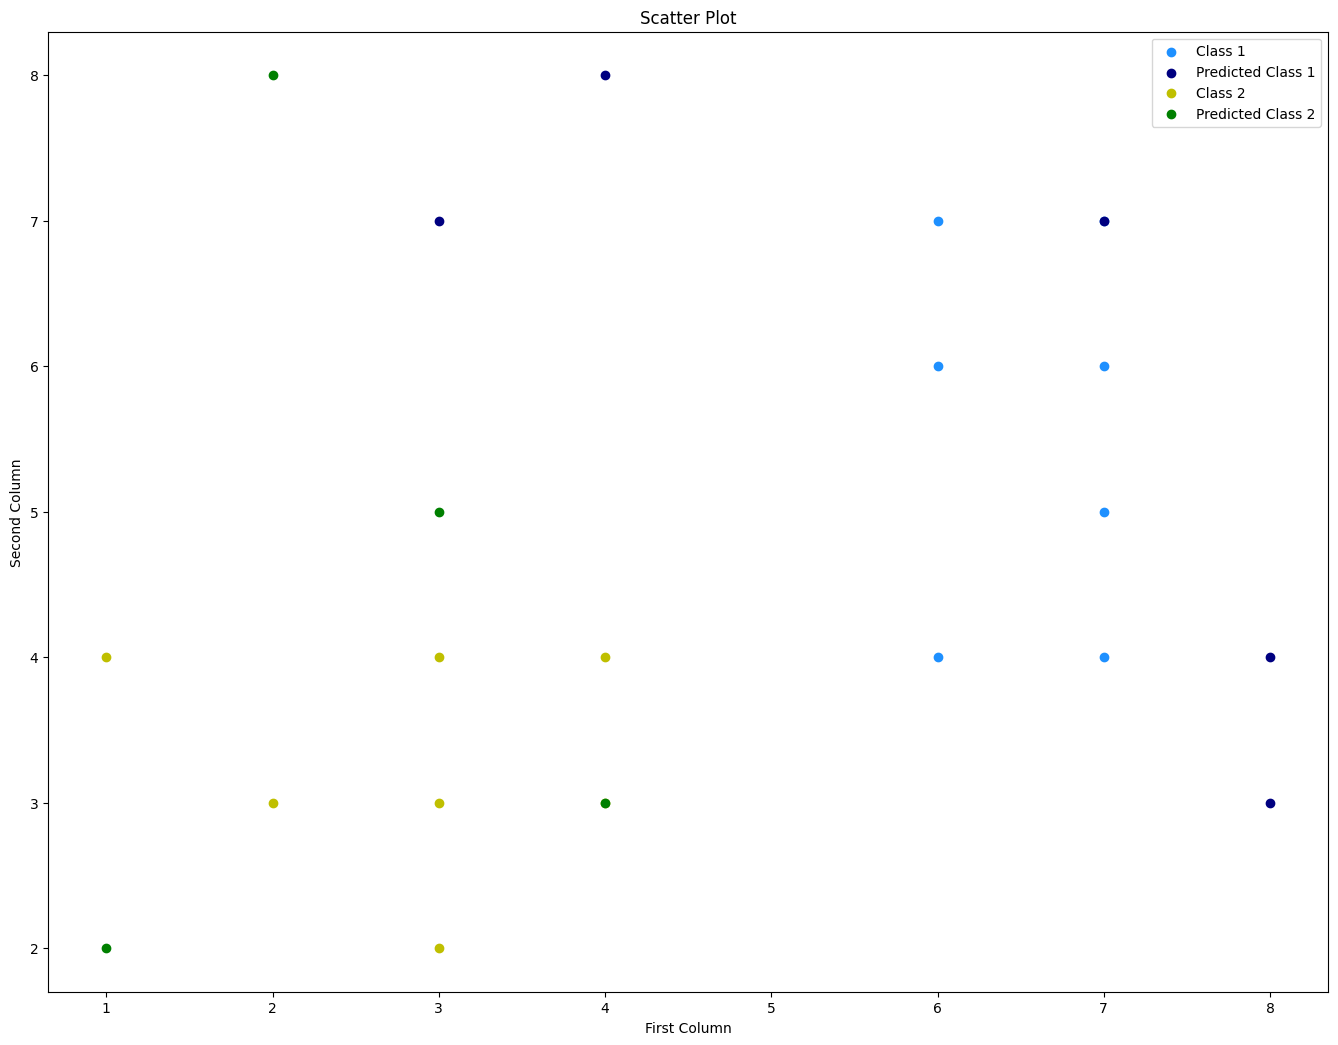

In [46]:
with open('prediction.txt', 'w') as writefile:
    for line in prediction_text:
        writefile.write(line)

df1 = pd.DataFrame(predicted_class_1, columns = [0,1])
df2 = pd.DataFrame(predicted_class_2, columns = [0,1])

fig=plt.figure()
ax=fig.add_axes([0,0,2,2])
ax.scatter(class_1[0], class_1[1], color='dodgerblue', label="Class 1")
ax.scatter(df1[0], df1[1], color='navy', label="Predicted Class 1")
ax.scatter(class_2[0], class_2[1] , color='y', label="Class 2")
ax.scatter(df2[0], df2[1] , color='g', label="Predicted Class 2")
ax.set_xlabel('First Column')
ax.set_ylabel('Second Column')
ax.set_title('Scatter Plot')
plt.legend(loc="upper right")
plt.show()